In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import pickle
import matplotlib.pyplot as plt

In [2]:
cast_df = None

with open('../data/the-movies-dataset/cast_for_network.pkl', 'rb') as fl:
    cast_df = pickle.load(fl)

In [53]:
def convert_ids(ids_in_csv):
    return pd.to_numeric(ids_in_csv, errors='coerce').astype('int64')
names_for_movies_df = pd.read_csv('../data/the-movies-dataset/movies_metadata.csv'
                        , converters={'id': lambda x: convert_ids(x), 'imdb_id': lambda x: convert_ids(x)}
                       ,usecols=['id', 'original_title'])

In [94]:
cast_df = cast_df.drop_duplicates()
names_for_movies_df = names_for_movies_df.drop_duplicates()
cast_df[['movie', 'name', 'id']].head()

,movie,name,id
0,862,Tom Hanks,31.0
1,862,Tim Allen,12898.0
2,862,Don Rickles,7167.0
3,862,Jim Varney,12899.0
4,862,Wallace Shawn,12900.0


In [95]:
merged_with_mov_names = cast_df[['movie', 'name', 'id']].merge(names_for_movies_df
                                        , how='inner'
                                        , left_on='movie'
                                        , right_on='id')

In [76]:
cast_df[cast_df.name == 'Tom Hanks'].shape

(72, 9)

In [84]:
merged_with_mov_names.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 563112 entries, 0 to 563111
Data columns (total 5 columns):
movie             563112 non-null int64
name              563112 non-null object
id_x              563112 non-null float64
id_y              563112 non-null int64
original_title    563112 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 25.8+ MB


In [23]:
movie_grouby = cast_df[['movie', 'name', 'id']].groupby('movie')

In [25]:
actor_groupby = cast_df[['movie', 'name', 'id']].groupby('name')

In [47]:
stop = True
x = 0
test_df = None
for group_name, group in actor_groupby:

    test_df = group
    
    if x == 14567:
        break
    x+=1
    #if stop:
    #    break

In [49]:
test_df

,movie,name,id
2,11571,Arlene Dahl,44881.0
16,41465,Arlene Dahl,44881.0
73,33740,Arlene Dahl,44881.0
2,253250,Arlene Dahl,44881.0
3,42767,Arlene Dahl,44881.0
3,212713,Arlene Dahl,44881.0
2,135312,Arlene Dahl,44881.0
1,249264,Arlene Dahl,44881.0
2,151310,Arlene Dahl,44881.0
0,37462,Arlene Dahl,44881.0


In [15]:
G = nx.MultiGraph(movie='Star Wars')

In [16]:
G.graph

{'movie': 'Star Wars'}

In [17]:
G.add_node(11)

In [18]:
G.add_edges_from([(11,2.0, {'name': 'Mark Hammil'}), (11, 5.0, {'name': 'Peter Cushing'})
                 , (11, 4.0, {'name': 'Carrie Fisher'}), (11, 15152, {'name': 'James Earl Jones'})])

[0, 0, 0, 0]

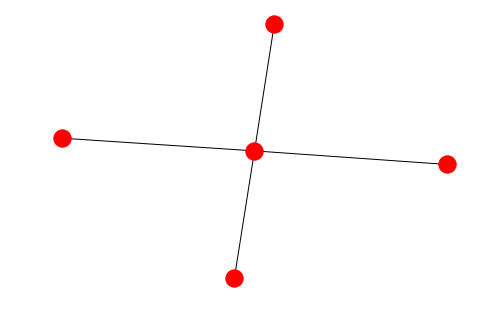

In [19]:
nx.draw(G)
#nx.draw_networkx_labels(G, pos=nx.spring_layout(G))

In [20]:
G.add_node(47)

In [21]:
G.add_edges_from([(47,2.0, {'name': 'Mark Hammil'})])

[0]

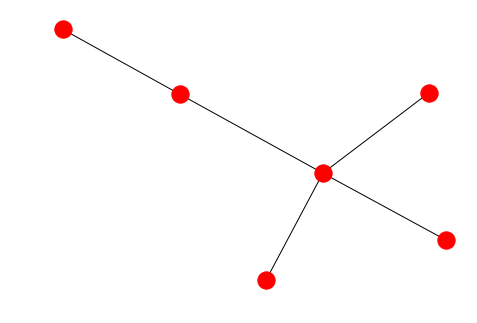

In [22]:
nx.draw(G)

In [ ]:
If some edges connect nodes not yet in the graph, the nodes are added automatically. If an edge already exists, an additional edge is created and stored using a key to identify the edge. By default the key is the lowest unused integer.

>>>
>>> keys = G.add_edges_from([(4,5,{'route':28}), (4,5,{'route':37})])
>>> G[4]
AdjacencyView({3: {0: {}}, 5: {0: {}, 1: {'route': 28}, 2: {'route': 37}}})

In [24]:
nx.info(G)

'Name: \nType: MultiGraph\nNumber of nodes: 6\nNumber of edges: 5\nAverage degree:   1.6667'

In [99]:
merged_with_mov_names.head()

,movie,name,id_x,id_y,original_title
0,862,Tom Hanks,31.0,862,Toy Story
1,862,Tim Allen,12898.0,862,Toy Story
2,862,Don Rickles,7167.0,862,Toy Story
3,862,Jim Varney,12899.0,862,Toy Story
4,862,Wallace Shawn,12900.0,862,Toy Story


In [100]:
actors_grouped = merged_with_mov_names.groupby('name')

In [242]:
actors_iter = actors_grouped.__iter__()

In [254]:
actor_grp = actors_iter.__next__()

In [257]:
for i in range(1, 3655):
    actor_grp = actors_iter.__next__()

In [258]:
actor_grp

('Keira Knightley',          movie             name   id_x    id_y  \
 43638     1893  Keira Knightley  116.0    1893   
 101248     455  Keira Knightley  116.0     455   
 105967      22  Keira Knightley  116.0      22   
 112021     508  Keira Knightley  116.0     508   
 130056    9477  Keira Knightley  116.0    9477   
 150117     467  Keira Knightley  116.0     467   
 151174   18072  Keira Knightley  116.0   18072   
 152521    9667  Keira Knightley  116.0    9667   
 166478    9923  Keira Knightley  116.0    9923   
 169000    4348  Keira Knightley  116.0    4348   
 175982      58  Keira Knightley  116.0      58   
 189282     285  Keira Knightley  116.0     285   
 192598   84242  Keira Knightley  116.0   84242   
 192757    4347  Keira Knightley  116.0    4347   
 194066   14753  Keira Knightley  116.0   14753   
 204559   14061  Keira Knightley  116.0   14061   
 206754   12783  Keira Knightley  116.0   12783   
 245915   42188  Keira Knightley  116.0   42188   
 249350   48

In [262]:
actor_grp[0]

'Keira Knightley'

In [263]:
actor_grp[1]

,movie,name,id_x,id_y,original_title
43638,1893,Keira Knightley,116.0,1893,Star Wars: Episode I - The Phantom Menace
101248,455,Keira Knightley,116.0,455,Bend It Like Beckham
105967,22,Keira Knightley,116.0,22,Pirates of the Caribbean: The Curse of the Bla...
112021,508,Keira Knightley,116.0,508,Love Actually
130056,9477,Keira Knightley,116.0,9477,King Arthur
150117,467,Keira Knightley,116.0,467,The Hole
151174,18072,Keira Knightley,116.0,18072,Pure
152521,9667,Keira Knightley,116.0,9667,The Jacket
166478,9923,Keira Knightley,116.0,9923,Domino
169000,4348,Keira Knightley,116.0,4348,Pride & Prejudice


In [264]:
import itertools

In [272]:
# edges = []
# for edge in itertools.combinations(actor_grp[1]['movie'].values, 2):
#     edges.append(edge)

In [277]:
edges2 = []
for edge in itertools.combinations(actor_grp[1]['movie'].values, 2):
    node1, node2 = edge
    edges2.append((node1, node2, {'Actor': 'Kiera Knightly'}))

In [273]:
len(edges)

630

In [274]:
actor_grp[1].shape

(36, 5)

In [279]:
edges2[0]

(1893, 455, {'Actor': 'Kiera Knightly'})

In [280]:
G2 = nx.MultiGraph()

In [281]:
G2.add_edges_from(edges2)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [282]:
nx.info(G2)

'Name: \nType: MultiGraph\nNumber of nodes: 36\nNumber of edges: 630\nAverage degree:  35.0000'

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


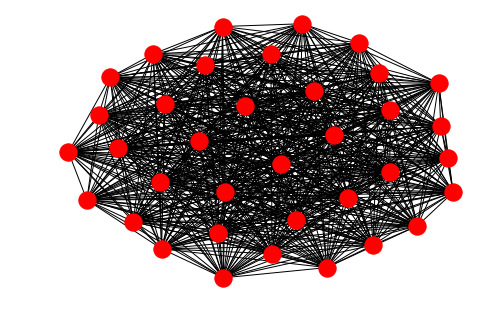

In [283]:
nx.draw(G2)

In [315]:
for i in range(1, 3200):
    actor_grp2 = actors_iter.__next__()

In [316]:
actor_grp2

('Rebecca Hall',
          movie          name     id_x    id_y            original_title
 181920    1124  Rebecca Hall  15556.0    1124              The Prestige
 186936   14055  Rebecca Hall  15556.0   14055            Starter for 10
 204709    5038  Rebecca Hall  15556.0    5038  Vicky Cristina Barcelona
 209544   11499  Rebecca Hall  15556.0   11499               Frost/Nixon
 232814   23488  Rebecca Hall  15556.0   23488               Dorian Gray
 237538   40247  Rebecca Hall  15556.0   40247               Please Give
 244432   23168  Rebecca Hall  15556.0   23168                  The Town
 261972   45658  Rebecca Hall  15556.0   45658        Everything Must Go
 277060   15044  Rebecca Hall  15556.0   15044    Einstein and Eddington
 280186   77949  Rebecca Hall  15556.0   77949             The Awakening
 295349   84305  Rebecca Hall  15556.0   84305          Lay the Favorite
 303924   59441  Rebecca Hall  15556.0   59441          A Bag of Hammers
 305538   68721  Rebecca Hall  155

In [317]:
edges3 = []
for edge in itertools.combinations(actor_grp2[1]['movie'].values, 2):
    node1, node2 = edge
    edges3.append((node1, node2, {'Actor': 'Rebecca Hall'}))

In [318]:
len(edges3)

253

In [319]:
edges3[0]

(1124, 14055, {'Actor': 'Rebecca Hall'})

In [330]:
HallGraph = nx.MultiGraph()

In [331]:
HallGraph.add_edges_from(edges3)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [332]:
nx.info(HallGraph)

'Name: \nType: MultiGraph\nNumber of nodes: 23\nNumber of edges: 253\nAverage degree:  22.0000'

In [323]:
HallGraph.add_nodes_from(G2)

In [333]:
nx.info(HallGraph)

'Name: \nType: MultiGraph\nNumber of nodes: 23\nNumber of edges: 253\nAverage degree:  22.0000'

In [346]:
list(nx.connected_components(HallGraph))

[{1124,
  4347,
  5038,
  11499,
  14055,
  15044,
  23168,
  23488,
  40247,
  43741,
  45658,
  59441,
  68721,
  77949,
  84305,
  146223,
  157353,
  207936,
  214081,
  267935,
  328425,
  339405,
  390059,
  401546},
 {(5038, 4347)}]

In [345]:
HallGraph.add_edges_from([(5038, 4347, {'Actor': 'Rebecca Hall'})])

[1]

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


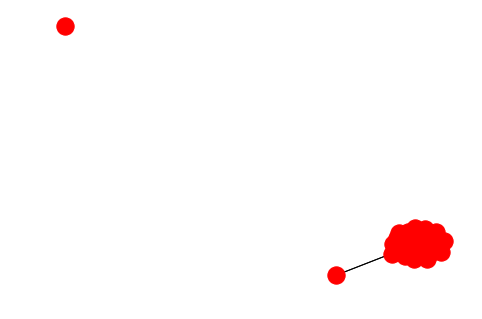

In [347]:
nx.draw(HallGraph)

In [351]:
HallGraph.add_edges_from(G2.edges)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


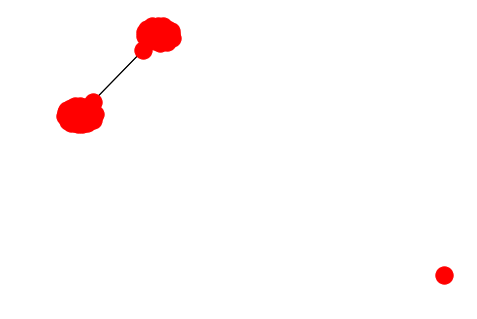

In [352]:
nx.draw(HallGraph)

In [436]:
rogan = nx.MultiGraph()
hill = nx.MultiGraph()
watson = nx.MultiGraph()
pitt = nx.MultiGraph()
bruhl = nx.MultiGraph()

In [397]:
film_node_ids = {'This is the End': 1
                , 'Superbad': 2
                , 'Moneyball': 3
                , 'Colonia': 4
                , 'Inglorious Basterds': 5}
node_name_dict = { v:k for k, v in film_node_ids.items()}

In [438]:
rogan.add_edges_from([(id_to_film_name_dict[1], id_to_film_name_dict[2], {'Actor': 'Seth Rogan'})])

[0]

In [399]:
nx.info(rogan)

'Name: \nType: MultiGraph\nNumber of nodes: 2\nNumber of edges: 1\nAverage degree:   1.0000'

In [443]:
rogan.node[id_to_film_name_dict[1]]

'This is the End'

In [446]:
rogan.node[id_to_film_name_dict[1]]['id'] = film_node_ids[id_to_film_name_dict[1]]
rogan.node[id_to_film_name_dict[2]]['id'] = film_node_ids[id_to_film_name_dict[2]]

In [448]:
rogan.node[id_to_film_name_dict[2]]

{'id': 2}

In [449]:
rogan.node[id_to_film_name_dict[1]]

{'id': 1}

In [450]:
rogan.edges()

MultiEdgeDataView([('This is the End', 'Superbad')])

In [408]:
#nx.compose(G1,G2)           - combine graphs identifying nodes common to both

In [451]:
e1 = (id_to_film_name_dict[1], id_to_film_name_dict[2], {'Actor': 'Jonah Hill'})
e2 = (id_to_film_name_dict[1], id_to_film_name_dict[3], {'Actor': 'Jonah Hill'})
e3 = (id_to_film_name_dict[2], id_to_film_name_dict[3], {'Actor': 'Jonah Hill'})
edges = [e1, e2, e3]

In [452]:
hill.add_edges_from([e1, e2, e3])

[0, 0, 0]

In [454]:
hill.nodes[id_to_film_name_dict[3]]['title'] = id_to_film_name_dict[3]
hill.nodes[id_to_film_name_dict[2]]['title'] = id_to_film_name_dict[2]
hill.nodes[id_to_film_name_dict[1]]['title'] = id_to_film_name_dict[1]


In [456]:
hill.nodes[id_to_film_name_dict[1]]

{'title': 'This is the End'}

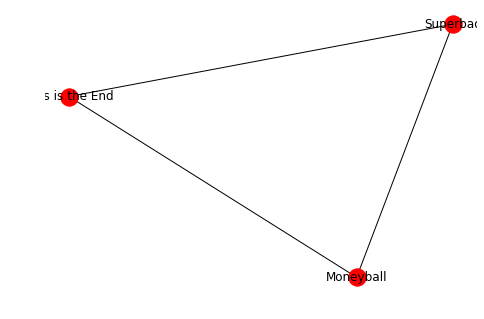

In [459]:
nx.draw(hill, with_labels=True)

In [460]:
composed = nx.compose(rogan, hill)

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


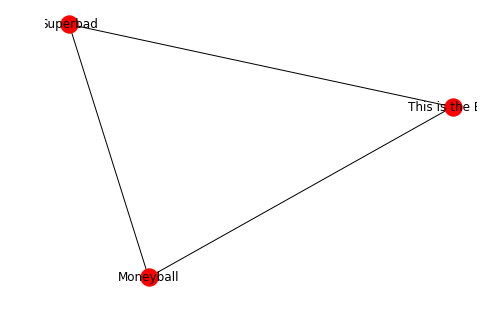

In [463]:
nx.draw(composed, with_labels=True)

[2, 2, 2]

In [464]:
A = nx.nx_agraph.to_agraph(composed) 

In [465]:
A.write('/Users/bjg/Desktop/graph.out')

In [466]:
pitt.add_edges_from([(id_to_film_name_dict[3], id_to_film_name_dict[5], {'Actor': 'Brad Pitt'})])

[0]

In [467]:
bruhl.add_edges_from([(id_to_film_name_dict[4], id_to_film_name_dict[5], {'Actor': 'Daniel Bruhl'})])

[0]

In [468]:
watson.add_edges_from([(id_to_film_name_dict[1], id_to_film_name_dict[4], {'Actor': 'Emma Watson'})])

[0]

In [469]:
pitt.nodes[id_to_film_name_dict[3]]['title'] = id_to_film_name_dict[3]
pitt.nodes[id_to_film_name_dict[5]]['title'] = id_to_film_name_dict[5]

bruhl.nodes[id_to_film_name_dict[4]]['title'] = id_to_film_name_dict[4]
bruhl.nodes[id_to_film_name_dict[5]]['title'] = id_to_film_name_dict[5]

watson.nodes[id_to_film_name_dict[1]]['title'] = id_to_film_name_dict[1]
watson.nodes[id_to_film_name_dict[4]]['title'] = id_to_film_name_dict[4]

In [473]:
four_movies = nx.compose_all([pitt, bruhl, watson])

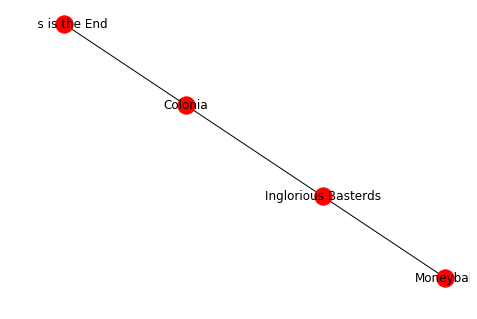

In [474]:
nx.draw(four_movies, with_labels=True)

In [475]:
sample_graph = nx.compose(four_movies, composed)

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


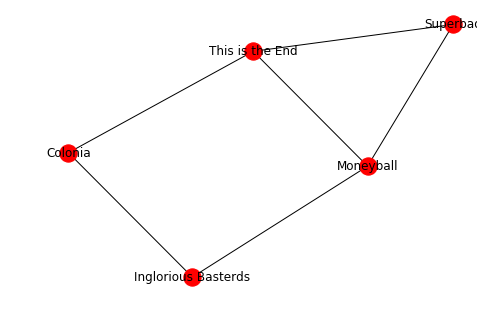

In [477]:
nx.draw(sample_graph, with_labels=True)

In [478]:
A2 = nx.nx_agraph.to_agraph(sample_graph) 

In [479]:
A2.write('/Users/bjg/Desktop/graph.out')

In [480]:
pos = nx.spring_layout(sample_graph)

In [481]:
import pylab

### Gameplan for Building the actual Graph

What data do I actually want in the graph? Any Rules for building the graph? 
* Nodes
    * Movie Names
        * Movie IDs
        
* Edges
    * Actor Names
    * Actor IDs

In [493]:
pitt.add_node(5, **{'test': 'Can props be added like this?'})

In [501]:
pitt.node[5]

{'test': 'Can props be added like this?'}

In [504]:
nx.set_node_attributes(5, {'test': 'or this?'})

AttributeError: 'int' object has no attribute 'nodes'

In [505]:
g1 = nx.MultiGraph()

In [506]:
g1.add_node(1)

In [507]:
g2 = nx.MultiGraph()

In [510]:
g2.add_node(2)#g2.add_node(1)

In [511]:
g2.node[1]['original'] = 'I was at Node 2'

In [512]:
g1.node[1]['original'] = 'I was at Node 1'

In [515]:
g3 = nx.compose(g2, g1)

In [516]:
g3.node[1]

{'original': 'I was at Node 1'}